In [111]:
# STEP1- IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [112]:
# STEP 2 -IMPORTING DATA

df = pd.read_csv(r"C:\Users\Lenovo\Documents\3mtt\capstone project\archive\covid_19_clean_complete.csv")

In [8]:
# CHECK THE FIRST FIVE ROWS OF THE DATA

print(df.head())
print(df.columns)

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  
Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')


In [65]:
# DESCRIBE THE DATA

df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [64]:
# CHECK FOR MISSING VALUE

df.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [68]:
# STEP 3 - HANDLING MISSING VALUES

df.fillna({'Province/State': 'Unknown'}, inplace=True)
df.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Unknown,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Unknown,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Unknown,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Unknown,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Unknown,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [18]:
# Active Case = confirmed - deaths - recovered

df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']


In [21]:
#Transform date column to datetime format

from datetime import datetime as dt

df['Date'] = pd.to_datetime(df['Date'])


df['Date'] = df['Date'].dt.normalize()
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

a = df.Date.value_counts().sort_index()
print(f"the first date is: {a.index[0]}")
print(f"the last date is: {a.index[-1]}")

total_cases = df.loc[:, ['Date', 'Confirmed']].groupby('Date').sum().reset_index()
total_cases.head(5)

the first date is: 2020-01-22
the last date is: 2020-07-27


,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [22]:
#Step 4: FEARTURE ENGINEERING

#load a new dataset with the new features
df_1=pd.read_csv(r"C:\Users\Lenovo\Documents\3mtt\capstone project\archive\worldometer_data.csv")

df_1.head(5)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [23]:
# Find the common columns
common_columns = set(df) & set(df_1)

# Print the common columns
print("Common columns:")
for column in common_columns:
    print(column)

Common columns:
Country/Region
WHO Region


In [24]:
# Check if the values in the common columns are the same
for column in common_columns:
    if df[column].equals(df_1[column]):
        print(f"The values in the '{column}' column are the same in both datasets.")
    else:
        print(f"The values in the '{column}' column are different in the two datasets.")


The values in the 'Country/Region' column are different in the two datasets.
The values in the 'WHO Region' column are different in the two datasets.


In [25]:
# Check for inconsistencies in country names between the two datasets
inconsistent_countries = set(df['Country/Region']) ^ set(df_1['Country/Region'])
print(inconsistent_countries)


{'Congo (Brazzaville)', 'West Bank and Gaza', 'Réunion', 'Cayman Islands', 'St. Vincent Grenadines', 'Isle of Man', 'Falkland Islands', "Cote d'Ivoire", 'Central African Republic', 'Taiwan', 'Taiwan*', 'Palestine', 'Brunei', 'US', 'United Kingdom', 'Martinique', 'Gibraltar', 'Ivory Coast', 'China', 'Kosovo', 'United Arab Emirates', 'Aruba', 'Sint Maarten', 'New Caledonia', 'Saint Vincent and the Grenadines', 'Burma', 'UAE', 'Faeroe Islands', 'DRC', 'Mayotte', 'French Polynesia', 'CAR', 'Holy See', 'S. Korea', 'Myanmar', 'USA', 'South Korea', 'Brunei ', 'Saint Martin', 'UK', 'Congo (Kinshasa)', 'Montserrat', 'Diamond Princess', 'Vatican City', 'Congo', 'Hong Kong', 'Guadeloupe', 'Caribbean Netherlands', 'Macao', 'Curaçao', 'Channel Islands', 'Bermuda', 'Turks and Caicos', 'French Guiana'}


In [26]:
# Merge the datasets
merged_df = pd.merge(df, df_1, on='Country/Region', how='outer', suffixes=('_x', '_y'))


In [83]:
# Print the merged dataset
print(merged_df.head())
print(merged_df.columns)
print(merged_df.shape)


  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0        Unknown    Afghanistan  33.93911  67.709953  2020-01-22        0.0   
1        Unknown    Afghanistan  33.93911  67.709953  2020-01-23        0.0   
2        Unknown    Afghanistan  33.93911  67.709953  2020-01-24        0.0   
3        Unknown    Afghanistan  33.93911  67.709953  2020-01-25        0.0   
4        Unknown    Afghanistan  33.93911  67.709953  2020-01-26        0.0   

   Deaths  Recovered  Active           WHO Region_x  ... TotalTests  \
0     0.0        0.0     0.0  Eastern Mediterranean  ...    90396.0   
1     0.0        0.0     0.0  Eastern Mediterranean  ...    90396.0   
2     0.0        0.0     0.0  Eastern Mediterranean  ...    90396.0   
3     0.0        0.0     0.0  Eastern Mediterranean  ...    90396.0   
4     0.0        0.0     0.0  Eastern Mediterranean  ...    90396.0   

   Tests/1M pop          WHO Region_y  daily_growth_rate_cases  \
0        2317.0  EasternMediterr

In [84]:
# Calculate daily growth rates

#merged_df['daily_growth_rate_cases'] = 
merged_df.groupby('Country/Region')['Confirmed'].pct_change(fill_method=None)
#merged_df['daily_growth_rate_deaths'] = 
merged_df.groupby('Country/Region')['Deaths'].pct_change(fill_method=None)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
49101    0.076923
49102    0.142857
49103    0.062500
49104    0.000000
49105    0.058824
Name: Deaths, Length: 49106, dtype: float64

In [70]:
# Calculate mortality ratios
merged_df['mortality_ratio'] = merged_df['Deaths'] / merged_df['Confirmed']


In [71]:
# Calculate cases per Population (assuming 'Population' column exists)
merged_df['cases_per_population'] = merged_df['Confirmed'] / merged_df['Population'] * 100000

In [72]:
# Calculate deaths per Population (assuming 'Population' column exists)
merged_df['deaths_per_population'] = merged_df['Deaths'] / merged_df['Population'] * 100000


In [73]:
# Calculate recovery rate
merged_df['recovery_rate'] = merged_df['Recovered'] / merged_df['Confirmed']


In [74]:
# Calculate active case rate
merged_df['active_case_rate'] = merged_df['Active'] / merged_df['Confirmed']

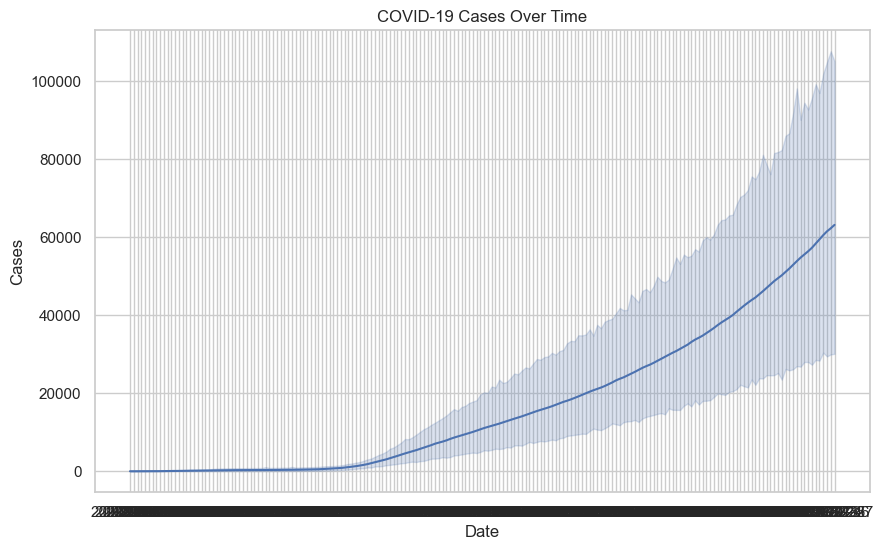

In [76]:
#STEP 5 EXPLORATORY DATA ANALYSIS

# Line plot: COVID-19 cases over time
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Confirmed', data=df)
plt.title('COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

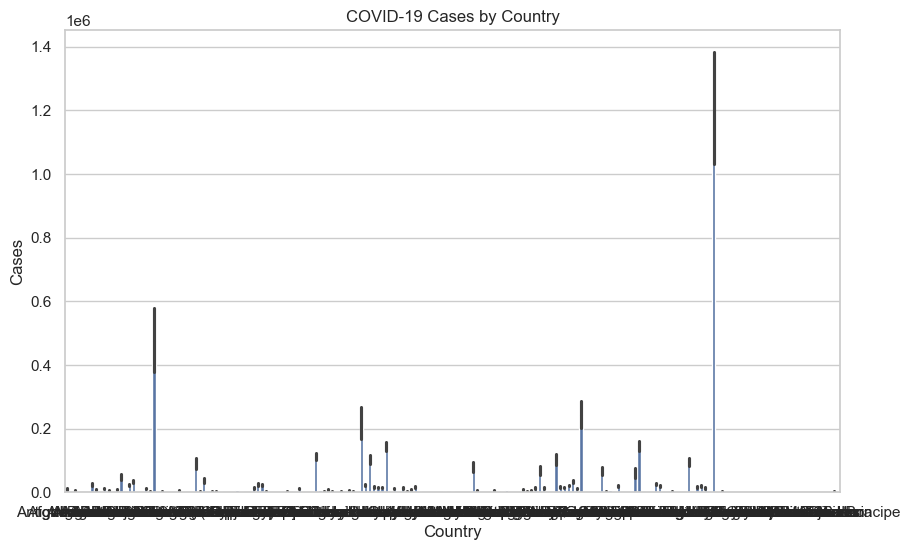

In [77]:
# Bar chart: COVID-19 cases by country
plt.figure(figsize=(10,6))
sns.barplot(x='Country/Region', y='Confirmed', data=df)
plt.title('COVID-19 Cases by Country')
plt.xlabel('Country')
plt.ylabel('Cases')
plt.show()


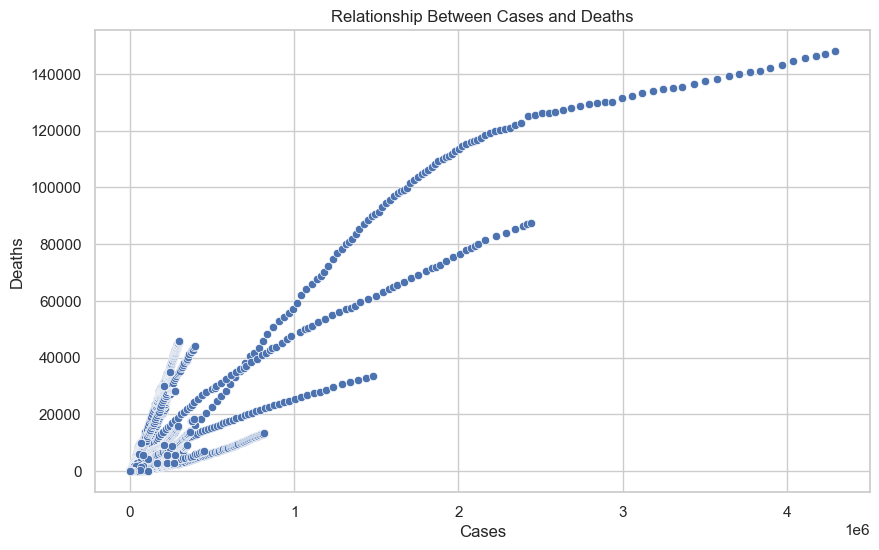

In [78]:
# Scatter plot: Relationship between cases and deaths
plt.figure(figsize=(10,6))
sns.scatterplot(x='Confirmed', y='Deaths', data=df)
plt.title('Relationship Between Cases and Deaths')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.show()

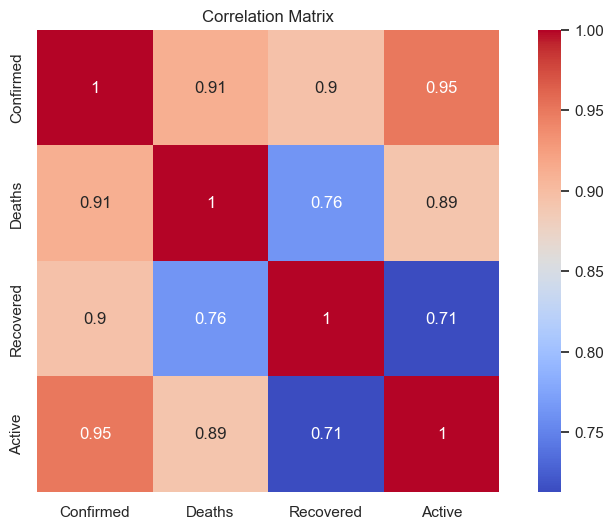

In [79]:
# Heatmap: Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


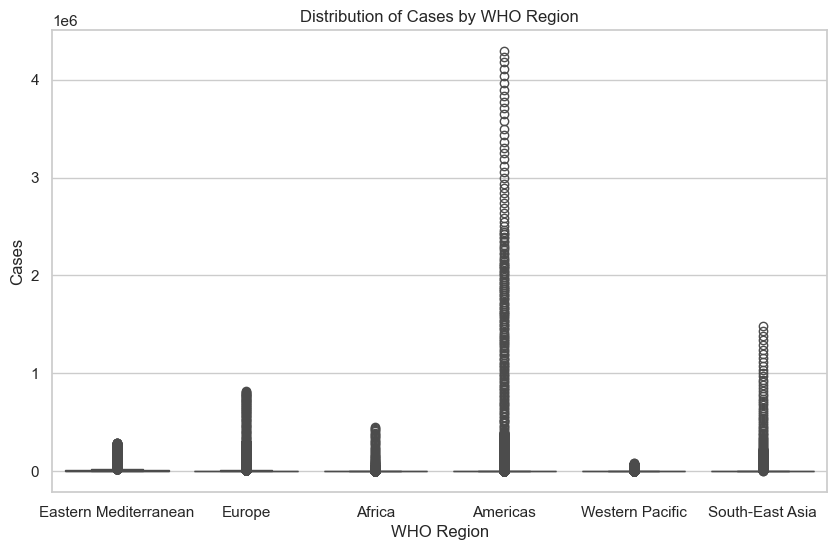

In [80]:
# Box plot: Distribution of cases by WHO region
plt.figure(figsize=(10,6))
sns.boxplot(x='WHO Region', y='Confirmed', data=df)
plt.title('Distribution of Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Cases')
plt.show()

In [81]:
# Identify top 10 countries with highest number of cases
top_10_countries = df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
print(top_10_countries)

Country/Region
US                224345948
Brazil             89524967
Russia             45408411
India              40883464
Spain              27404045
United Kingdom     26748587
Italy              26745145
France             21210926
Germany            21059152
Iran               19339267
Name: Confirmed, dtype: int64


In [82]:
# Identify top 10 countries with highest number of deaths
top_10_deaths = df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)
print(top_10_deaths)

Country/Region
US                11011411
United Kingdom     3997775
Brazil             3938034
Italy              3707717
France             3048524
Spain              3033030
Mexico             1728277
India              1111831
Iran               1024136
Belgium             963679
Name: Deaths, dtype: int64


In [115]:
plt.figure(figsize= (14,5))
ax = sns.pointplot(x=total_cases['Date'],
                   y=total_cases['Confirmed'],
                   color='r')
ax.set(xlabel='Dates', ylabel='Total cases')

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

plt.xlabel('Dates', fontsize=14)
plt.ylabel('Total cases', fontsize=14)
plt.title('Worldwide Confirmed Cases Over Time', fontsize=20)

with sns.axes_style('white'):
    
    g = sns.relplot(
        x="Date", 
        y="Deaths", 
        kind="line", 
        data=df
    )
    g.fig.autofmt_xdate()
    g.set_xticklabels(step=10)
    plt.title("Covid-19 Deaths, Year:2020", fontsize=16)

    top = df.loc[df['Date'] == df['Date'].max()]
    
    top_casualities = top.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending =False).head(10).reset_index()

top_casualities

sns.set(style="darkgrid")
plt.figure(figsize= (15,10))

ax = sns.barplot(x=top_casualities['Confirmed'],
                 y=top_casualities['Country/Region'])

for i, (value, name) in enumerate(zip(top_casualities['Confirmed'], top_casualities['Country/Region'])):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total cases', ylabel='Country/Region')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases', fontsize=30)
plt.ylabel('Country', fontsize=30)
plt.title('Top 10 countries having most confirmed cases', fontsize=20)

US_data = df.loc[df['Country/Region'] == 'Brazil', ['Date', 'Recovered', 'Deaths', 'Confirmed', 'Active']]
US_data.head()

US_data = US_data.groupby('Date').sum().reset_index()
US_data = US_data.iloc[33:]
US_data.head()

plt.figure(figsize=(15,5))
sns.set_color_codes("pastel")


sns.pointplot(x=US_data.index, y=US_data['Active'], color='b')

plt.xlabel('No. of Days', fontsize=15)
plt.ylabel('Active cases', fontsize=15)
plt.title("US's Active Cases Over Time", fontsize=25)

sns.set(style="whitegrid")


In [116]:
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 5))

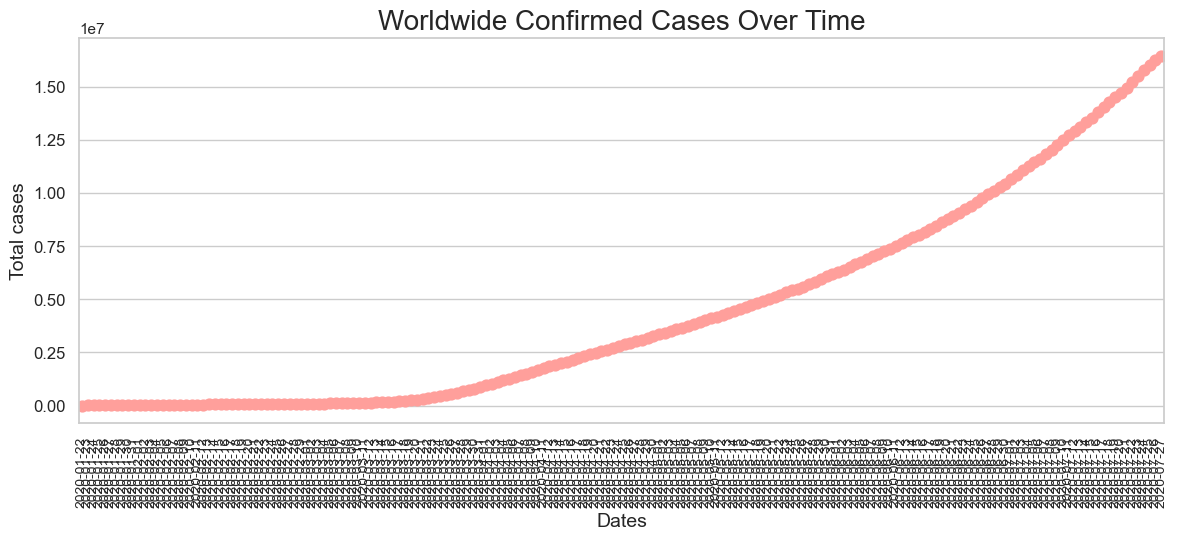

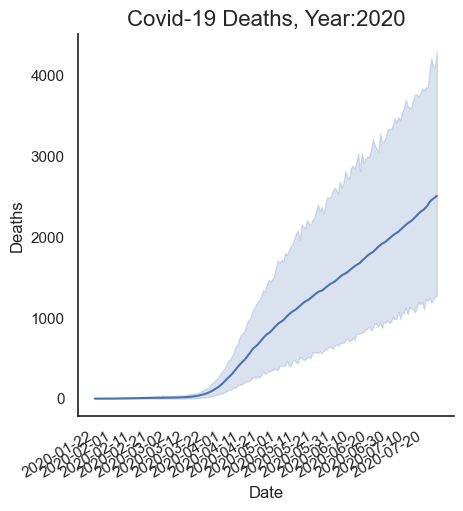

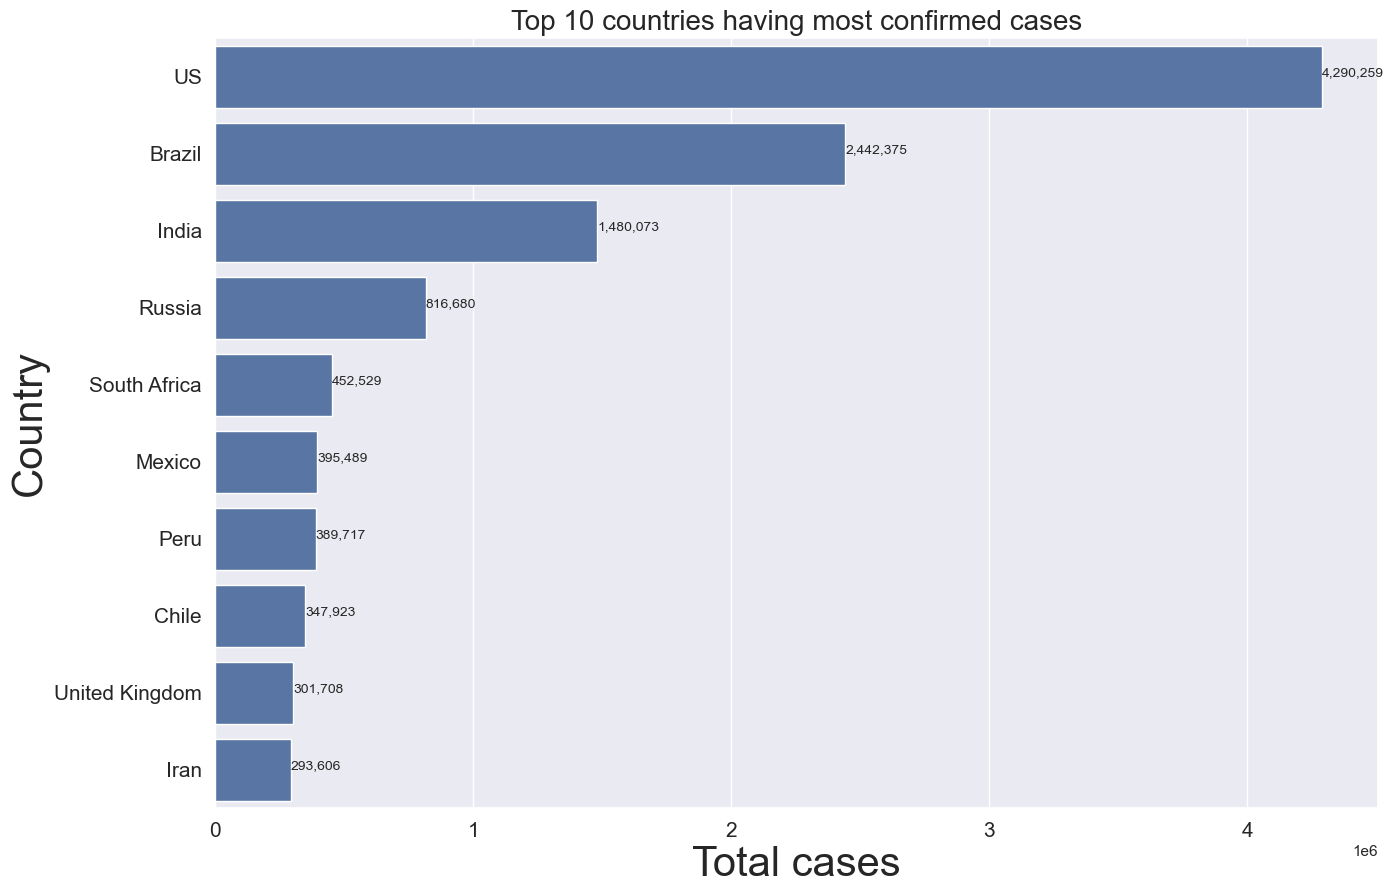

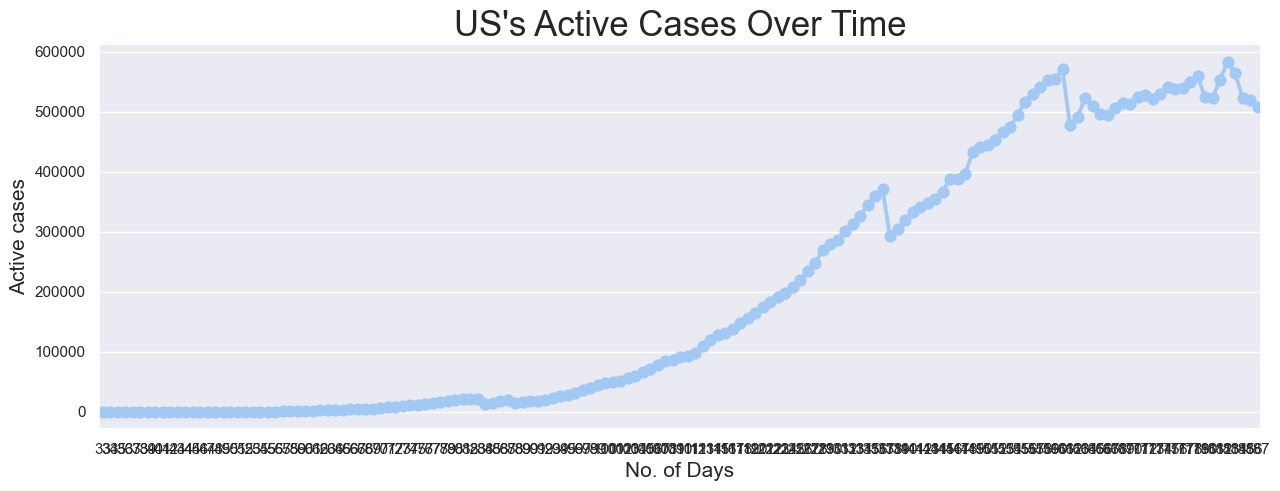

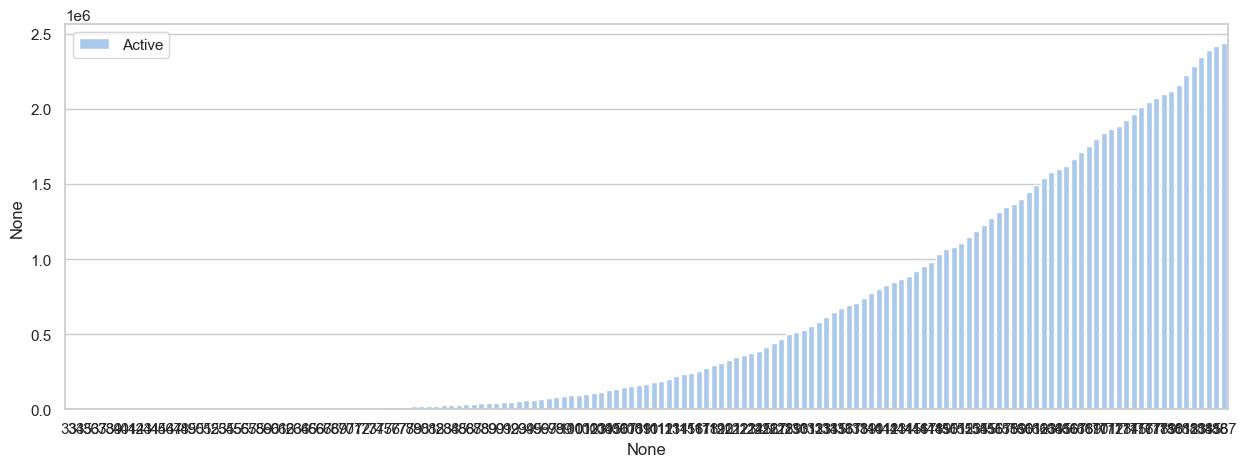

In [117]:
# Plot the total cases
sns.set_color_codes("pastel")
sns.barplot(x=US_data.index, y=US_data.Active + US_data.Recovered + US_data.Deaths,
            label="Active", color="b")

plt.show()

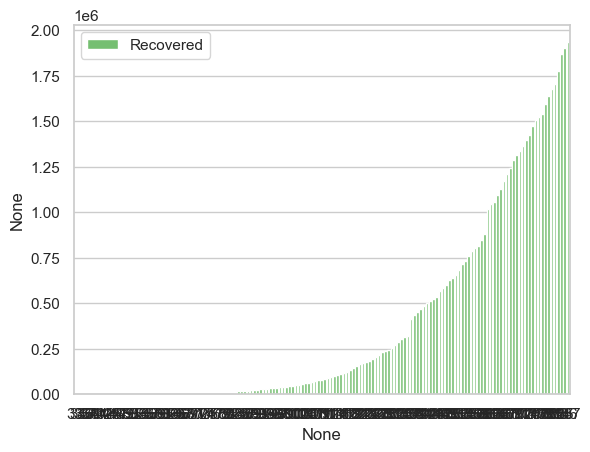

In [103]:
# Plot the recovered
sns.set_color_codes("muted")
sns.barplot(x=US_data.index, y=US_data.Recovered + US_data.Deaths, 
            label="Recovered", color="g")

plt.show()

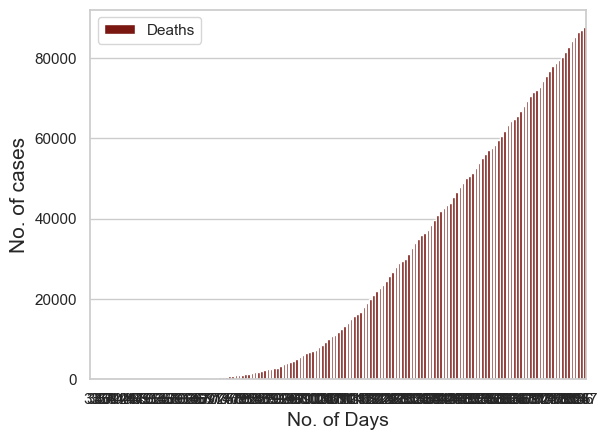

In [113]:
# Plot the Deaths
sns.set_color_codes("dark")
sns.barplot(x=US_data.index ,y=US_data.Deaths, 
            label="Deaths", color="r")

plt.xlabel('No. of Days', fontsize=14)
plt.ylabel('No. of cases', fontsize=15)

plt.show()

In [99]:
# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True)
sns.despine(top=True)

In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [106]:
# STEP 6 - TRAIN THE MODEL

# Prepare data (convert date to numerical format)
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)  # Convert date to ordinal format (numeric)


In [107]:

# Define features (X) and target (y)
X = df[['Date']]  # Feature: Date
y = df['Confirmed']  # Target: Confirmed cases

# Split data into training and test sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)


In [108]:
# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 18838245490.75016


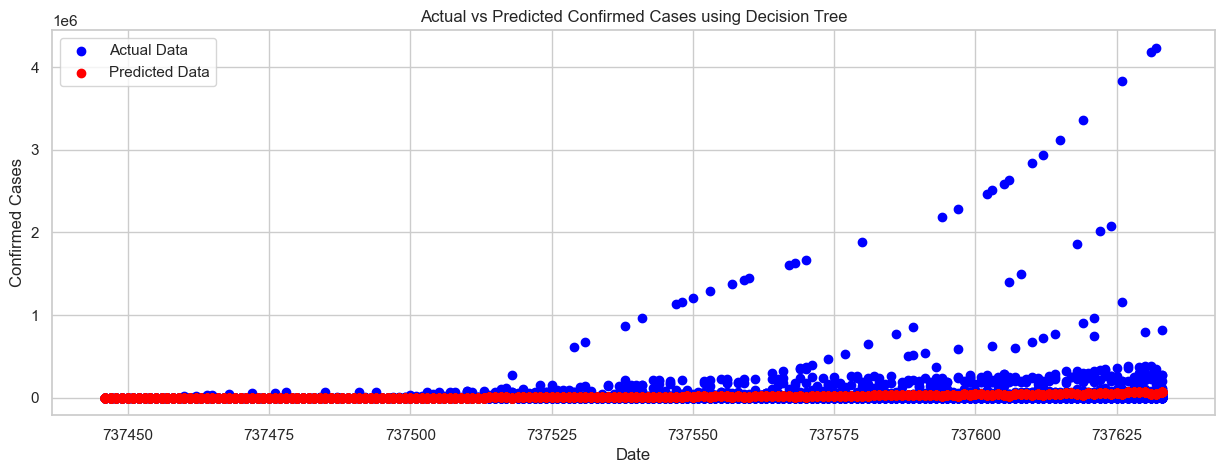

In [109]:
# Plot the original data and the predicted values
plt.figure(figsize=(15,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')  # Actual data points
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')  # Predicted data points
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases using Decision Tree')
plt.legend()
plt.show()


In [110]:
# Time-Series Modeling (ARIMA)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
model = ARIMA(train_df['Confirmed'], order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test_df))
mse = mean_squared_error(test_df['Confirmed'], forecast)
print(f'RMSE: {np.sqrt(mse)}')

# Classification Modeling (Random Forest)
X = df[['Confirmed', 'Deaths', 'Recovered', 'Active']]
y = np.where(df['Confirmed'] > df['Recovered'], 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next v

RMSE: 137939.49151548752
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2435
           1       1.00      1.00      1.00      7379

    accuracy                           1.00      9814
   macro avg       1.00      1.00      1.00      9814
weighted avg       1.00      1.00      1.00      9814

Confusion Matrix:
[[2435    0]
 [   0 7379]]
